In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

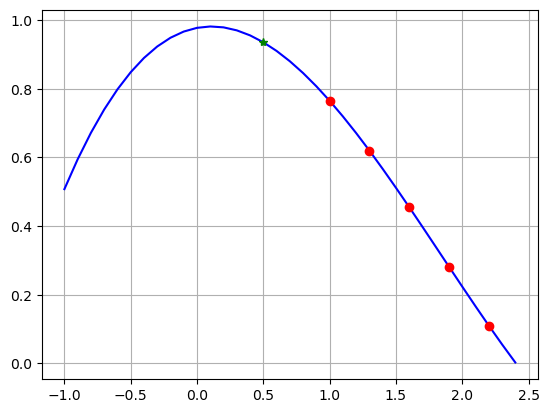

In [16]:
def interpolacaoNewton(x, y, xi):
    n = len(x)
    diferDivididas = [[None for x in range(n)] for x in range(n)]
    
    for i in range(n):
        diferDivididas[i][0] = y[i]
    
    for j in range(1, n):
        for k in range(n-j):
            diferDivididas[k][j] = (diferDivididas[k+1][j-1] - diferDivididas[k][j-1])/(x[k+j] - x[k])

    """tabelaDiferencasDivididas = pd.DataFrame(diferDivididas)
    print(tabelaDiferencasDivididas)"""
    
    xTerm = 1
    yInterp = diferDivididas[0][0]
    
    for ordem in range(1, n):
        xTerm *= (xi - x[ordem - 1])
        yInterp += diferDivididas[0][ordem]*xTerm
    
    return yInterp


"""x = [-1, 0, 2]
y = [4, 1, -1]"""

x = [1.0, 1.3, 1.6, 1.9, 2.2]
y = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

xp = 0.5
yp = interpolacaoNewton(x, y, xp)

intervalo = np.arange(-1.0, 2.5, 0.1)
ym = []

for i in intervalo:
    ym.append(interpolacaoNewton(x, y, i))
    
plt.figure()
plt.plot(intervalo, ym, 'b-')
plt.plot(x, y, 'ro')
plt.plot(xp, yp, 'g*')
plt.grid()
plt.show()